## Import Data and Required Packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
data= pd.read_csv("data/StudentsPerformance.csv")

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelors degree,Standard,none,72,72,74
1,female,group C,some college,Standard,completed,69,90,88
2,female,group B,master's degree,Standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,Standard,none,76,78,75


## Preparing X and Y variable

In [12]:
X = data.drop(columns = ["writing score"], axis =1)
y =data["writing score"]

In [17]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ['bachelors degree' 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['Standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [18]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [20]:
X = preprocessor.fit_transform(X)

In [24]:
X.shape

(1000, 19)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((700, 19), (300, 19))

## Create an Evaluate Function to give all metrics after model Training

In [26]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3676
- Mean Absolute Error: 2.6948
- R2 Score: 0.9477
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.7202
- Mean Absolute Error: 3.0722
- R2 Score: 0.9466


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.5429
- Mean Absolute Error: 3.6866
- R2 Score: 0.9049
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.8162
- Mean Absolute Error: 3.8085
- R2 Score: 0.9105


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.3677
- Mean Absolute Error: 2.6955
- R2 Score: 0.9477
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.7204
- Mean Absolute Error: 3.0727
- R2 Score: 0.9466


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.0881
- Mean Absolute Error: 3.3149
- R2 Score: 0.9230
-----------------------

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.946613
2,Ridge,0.946608
7,CatBoosting Regressor,0.923994
6,XGBRegressor,0.914290
5,Random Forest Regressor,0.913567
1,Lasso,0.910526
8,AdaBoost Regressor,0.905643
3,K-Neighbors Regressor,0.890989
4,Decision Tree,0.844068


In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.66


## Plotting y_pred and y_test

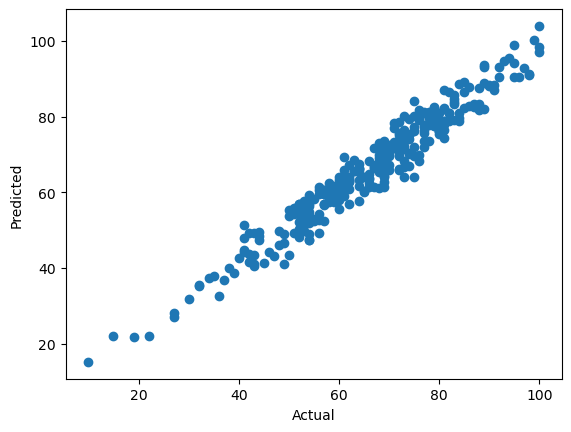

In [35]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

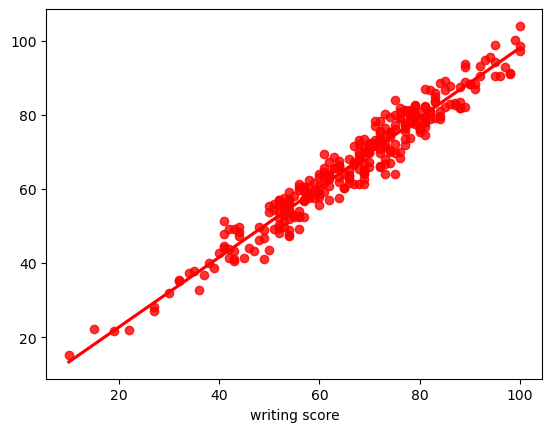

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,84,88.623812,-4.623812
737,73,66.765843,6.234157
740,72,73.440908,-1.440908
660,73,71.394940,1.605060
411,78,79.830107,-1.830107
...,...,...,...
468,85,86.608700,-1.608700
935,58,62.315094,-4.315094
428,53,54.747870,-1.747870
7,39,38.560500,0.439500
